## Train-Test Split Analysis

One final analysis would be to check how would the data distribution look like once we have split the dataset.

According to the paper, it was a 70/30 split

In [1]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH_TWO_M")
dataset = pd.read_csv(dataset_path)
dataset.head()

,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,Hip Sum Variance,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,0,87.18412,2,25.0,0.576119,41.516993,0.611460,79.814266,8.965251,277.740071,...,368.245672,0.175542,216.250128,33.930873,496.754841,2.455708,8151.153118,2.497000,2210.0,5354.20
1,1,83.02190,1,29.0,0.104620,190.636798,0.559982,222.087675,41.537126,697.713902,...,267.444573,0.407987,227.356779,27.734884,641.982542,2.747380,-2338.896143,2.685500,1223.0,2944.30
2,0,87.32600,0,30.0,0.110000,NaN,NaN,149.860000,50.100000,NaN,...,232.310000,0.455000,214.970000,37.595000,627.575000,3.295000,NaN,2.761275,1932.0,3385.85
3,0,85.15340,0,29.0,0.227405,NaN,0.502037,236.747564,29.247323,710.169115,...,236.821140,0.502037,236.747564,29.247323,710.169115,2.923999,-1418.526557,2.956000,2180.0,3478.40
4,1,71.72600,2,22.0,0.150000,185.770000,0.550000,205.680000,31.490000,636.960000,...,272.700000,0.395000,223.495000,31.255000,621.290000,3.030000,1717.020000,2.426235,1275.0,3018.85


In [3]:
# Split dataset
from sklearn.model_selection import train_test_split

copy_dataset = dataset.copy()

X = copy_dataset.drop(columns = ["DIAGNOSIS"])
y = copy_dataset["DIAGNOSIS"]

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X, 
                                                    y, 
                                                    test_size = .30, 
                                                    random_state = 42,
)

X_train_vis.shape, X_test_vis.shape, y_train_vis.shape, y_test_vis.shape

((875, 22), (376, 22), (875,), (376,))

### Input feature analysis

Lets see how our data looks now after we split it

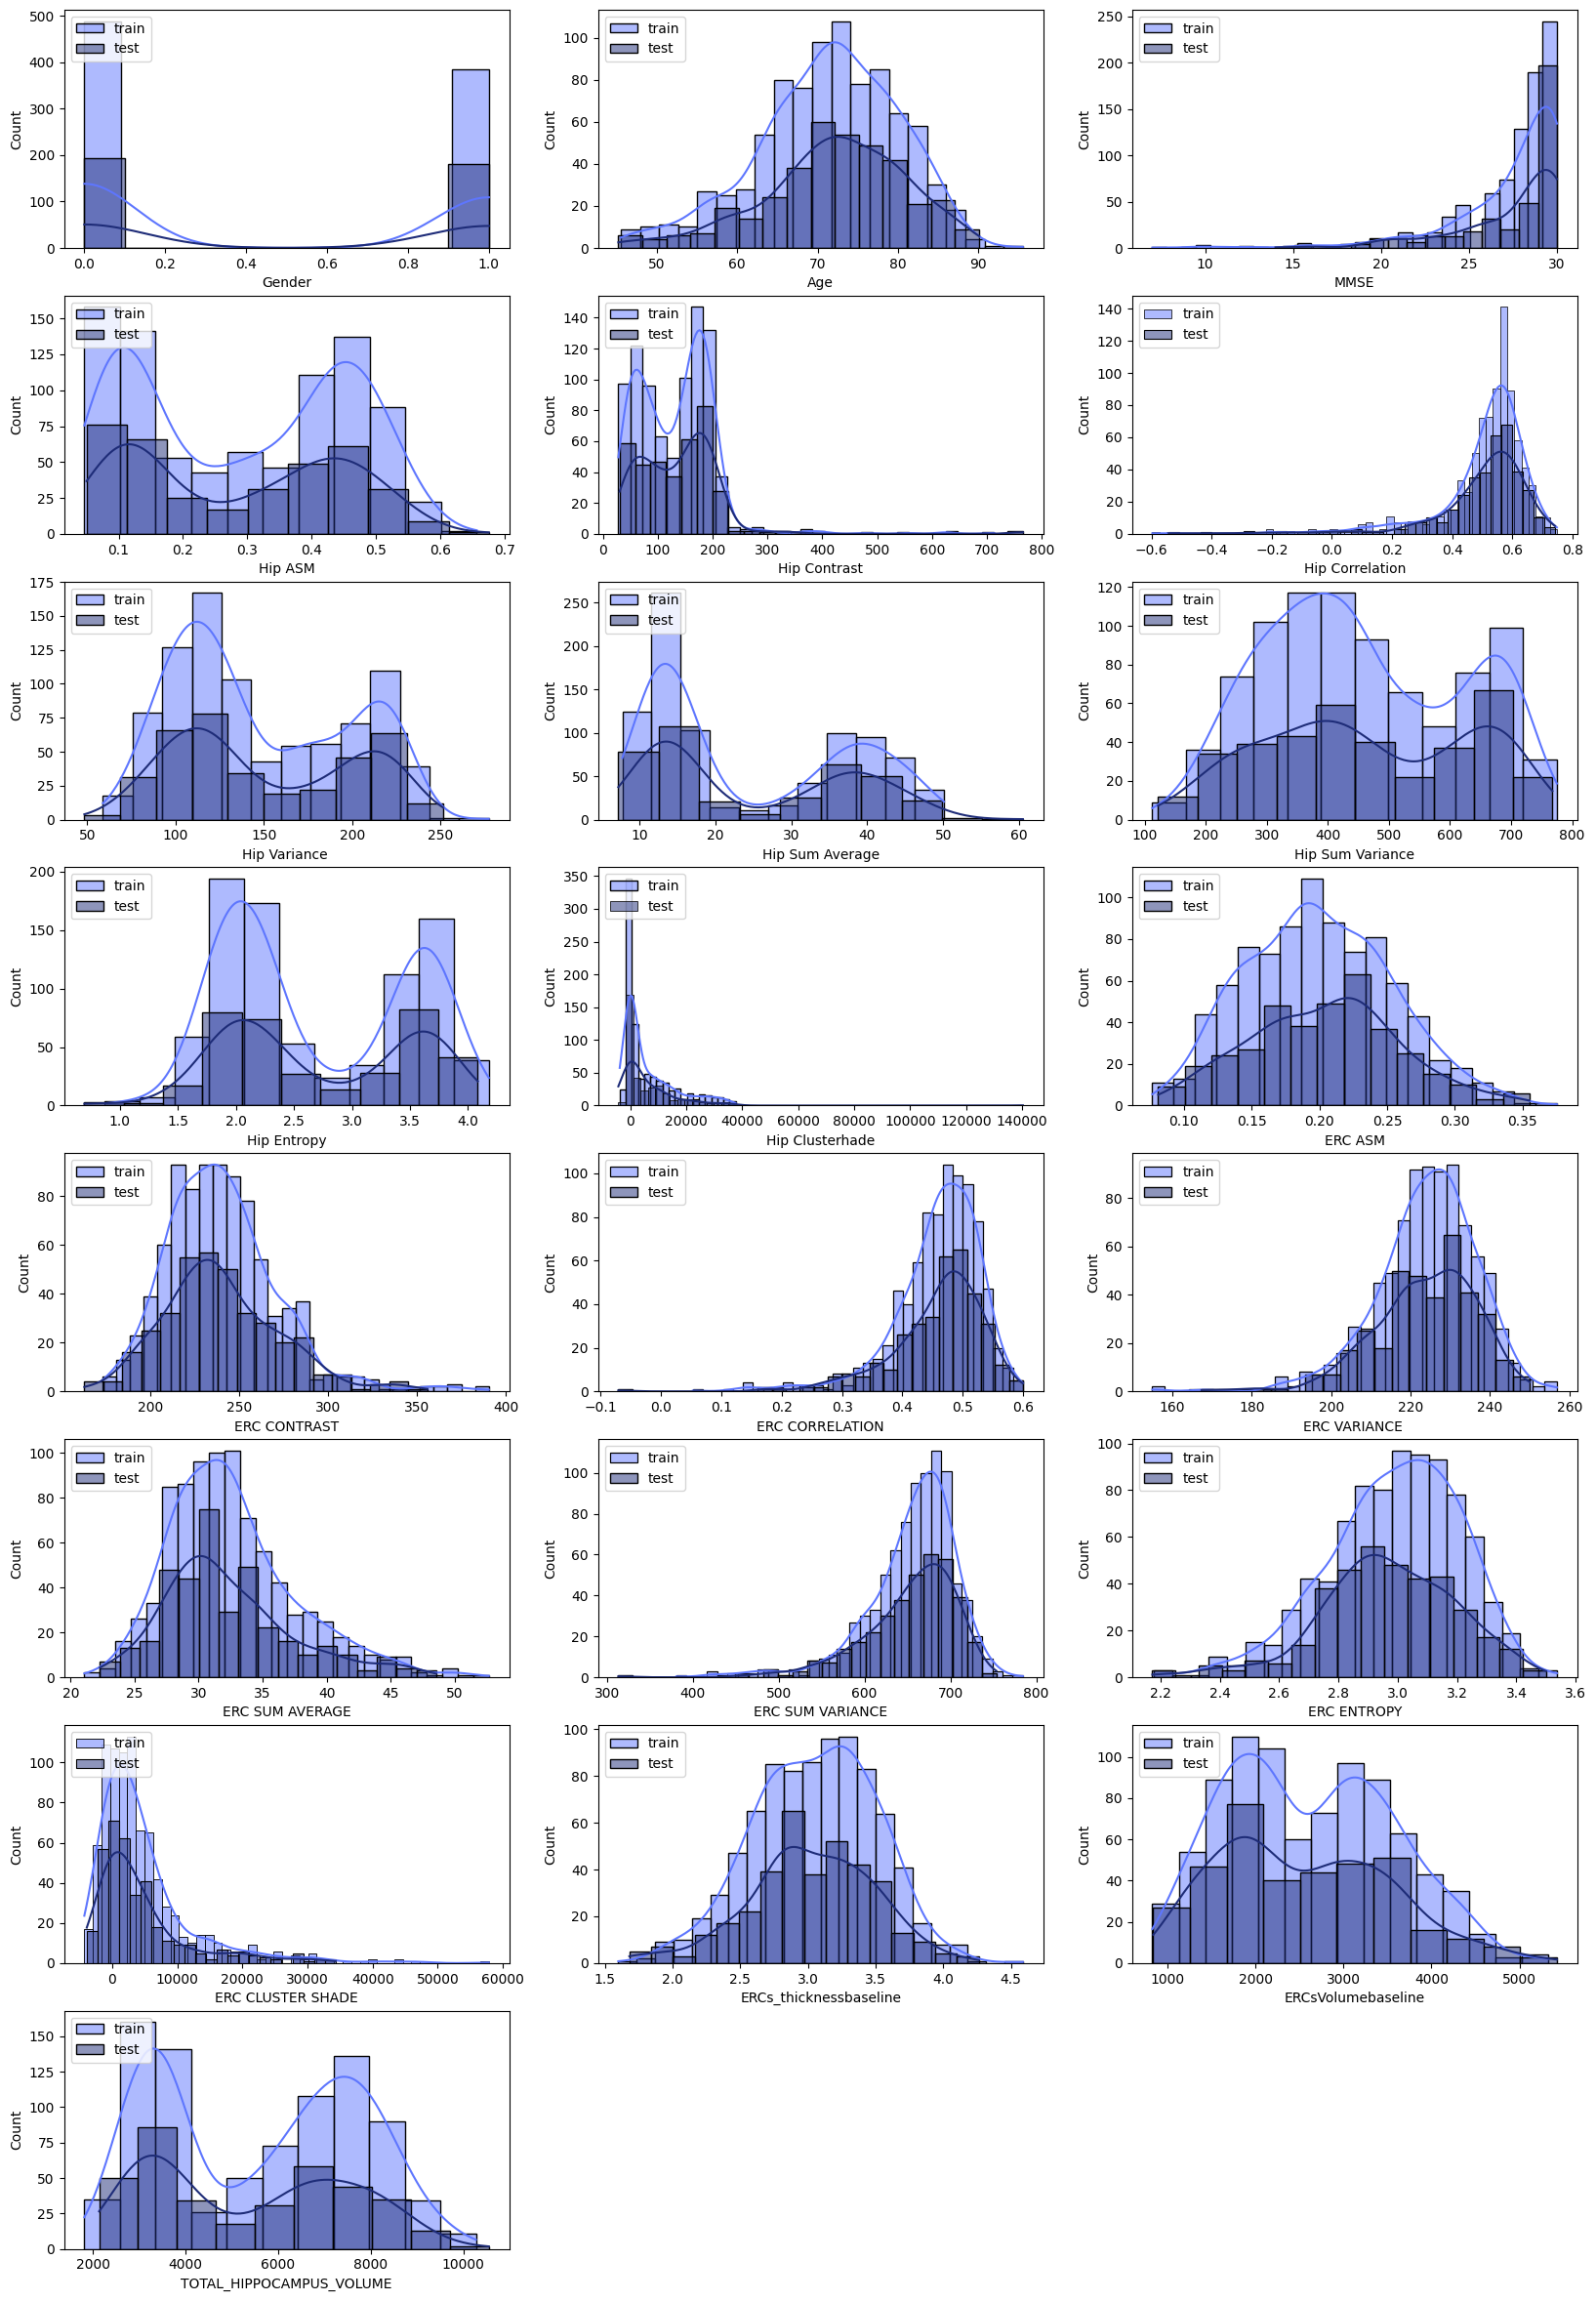

In [4]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_vis.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_vis[X_train_vis.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_vis[X_test_vis.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


It appears that some observations are included in the test set while other values are excluded in the training set. 

The last graph is a good example - notice from left to right. 

Lets have a closer look

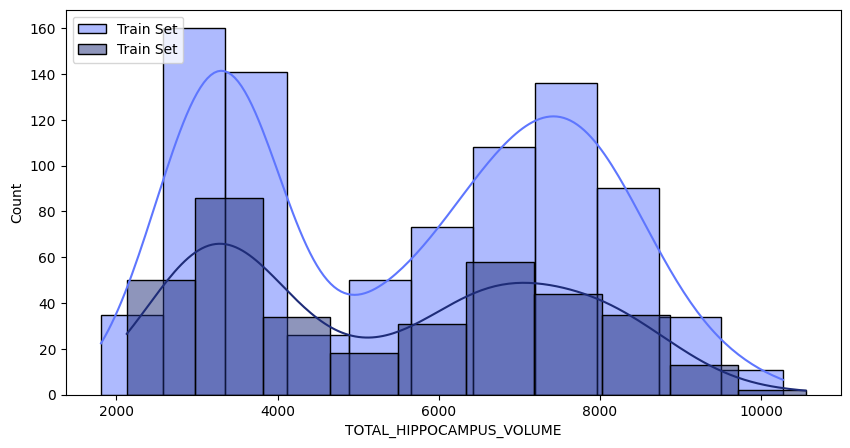

In [5]:
# Plot histogram of training/test set
plt.figure(figsize=(10, 5))

sns.histplot(X_train_vis["TOTAL_HIPPOCAMPUS_VOLUME"], color="#5e76fe", kde=True, label='Train Set', alpha=0.5)
sns.histplot(X_test_vis["TOTAL_HIPPOCAMPUS_VOLUME"], color="#1e2c78", kde=True, label='Train Set', alpha=0.5)
plt.legend(loc="upper left")

**This could be one of the few reasons why some of the models will underperform later on.**

Now lets check for the target split

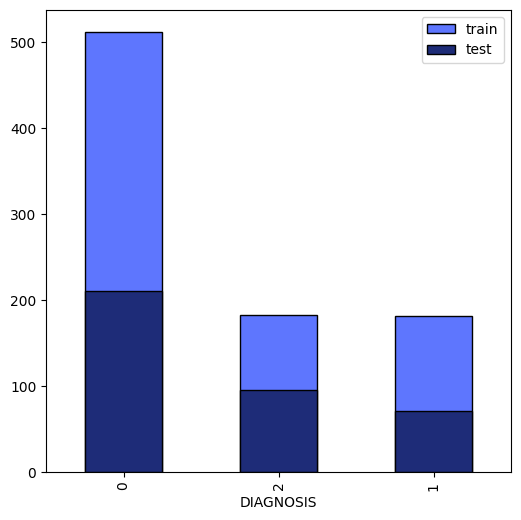

In [6]:
# Plot the target of training/test set using bar
plt.figure(figsize = (6,6))

y_train_vis.value_counts().plot(kind = "bar", 
                            color = "#5e76fe",
                            edgecolor = "black",
                            label="train",
)

y_test_vis.value_counts().plot(kind = "bar", 
                            color = "#1e2c78",
                            edgecolor = "black",
                            label="test",
)

plt.legend(loc="upper right")

In [7]:
y_train_vis.value_counts()

DIAGNOSIS
0    512
2    182
1    181
Name: count, dtype: int64

In [8]:
y_test_vis.value_counts()

DIAGNOSIS
0    210
2     95
1     71
Name: count, dtype: int64

### Removing null values

In [9]:
null_dataset = dataset.dropna()

In [10]:
X_train_vis_null, X_test_vis_null, y_train_vis_null, y_test_vis_null = train_test_split(null_dataset.drop(columns=["DIAGNOSIS"]), 
                                                    null_dataset["DIAGNOSIS"], 
                                                    test_size = .30, 
                                                    random_state = 42,
)

X_train_vis_null.shape, X_test_vis_null.shape, y_train_vis_null.shape, y_test_vis_null.shape

((770, 22), (331, 22), (770,), (331,))

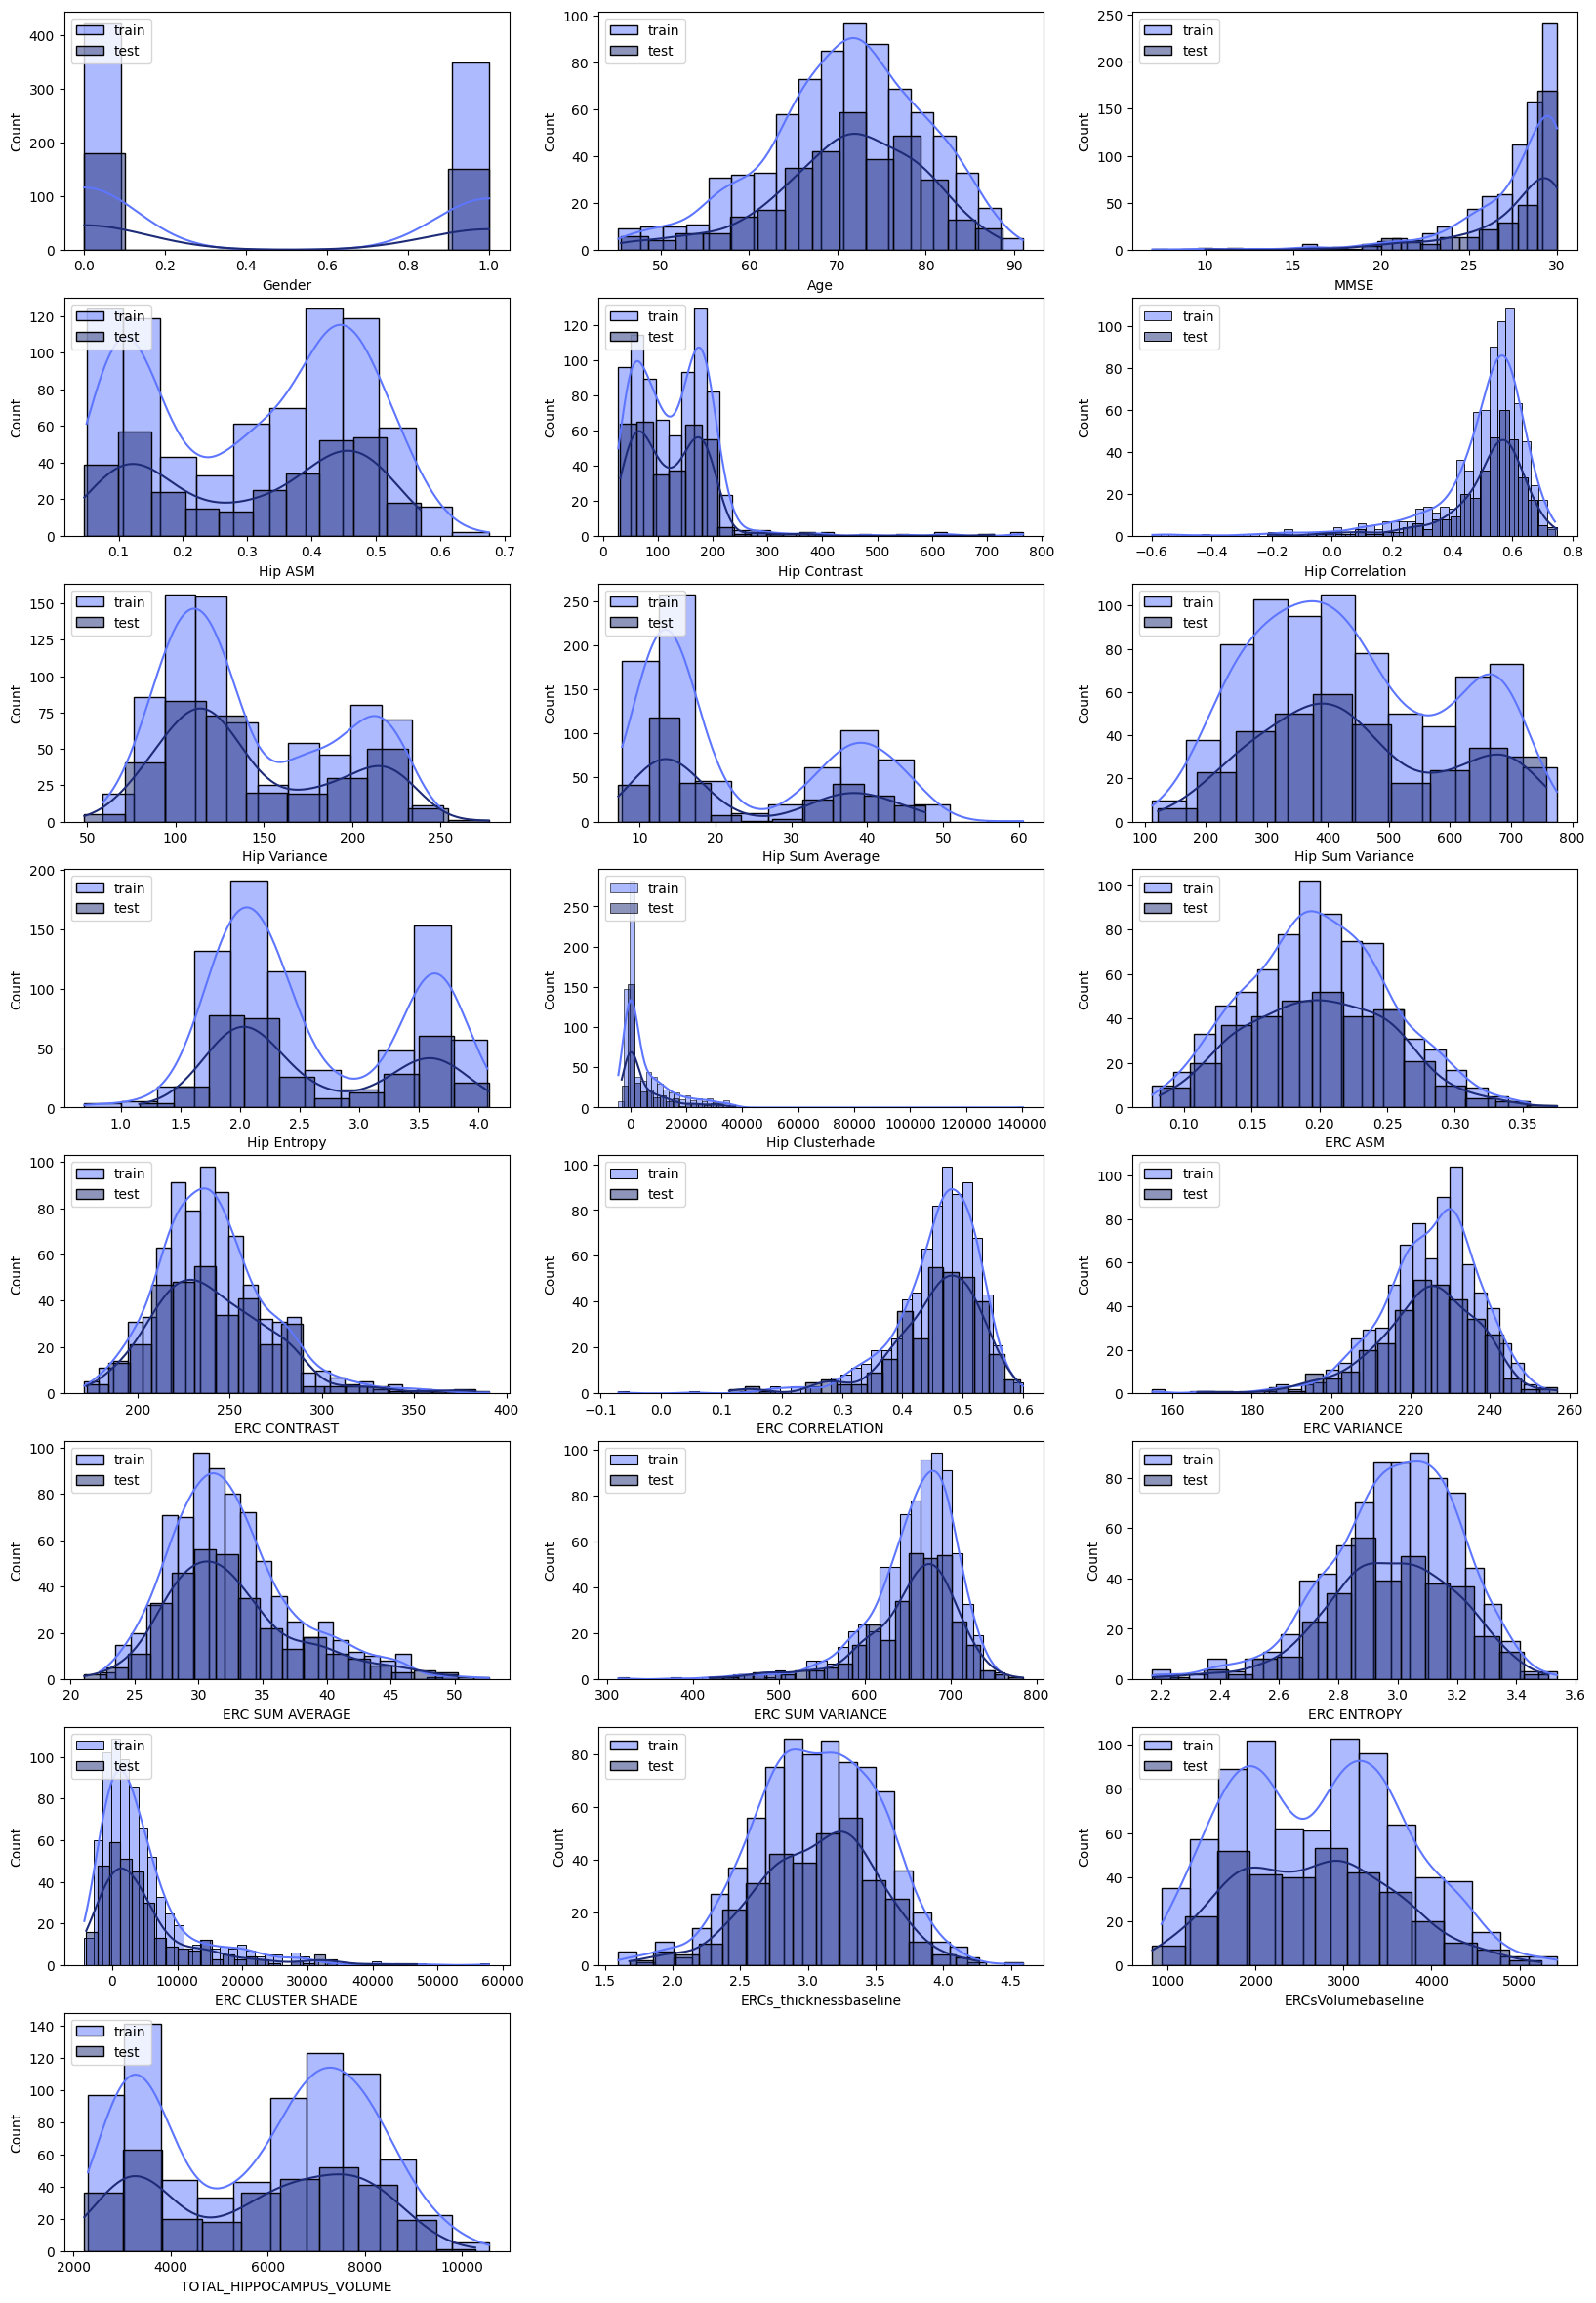

In [11]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_vis_null.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_vis_null[X_train_vis_null.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_vis_null[X_test_vis_null.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


In [12]:
y_train_vis_null.value_counts()

DIAGNOSIS
0    455
2    164
1    151
Name: count, dtype: int64

In [13]:
y_test_vis_null.value_counts()

DIAGNOSIS
0    195
2     74
1     62
Name: count, dtype: int64

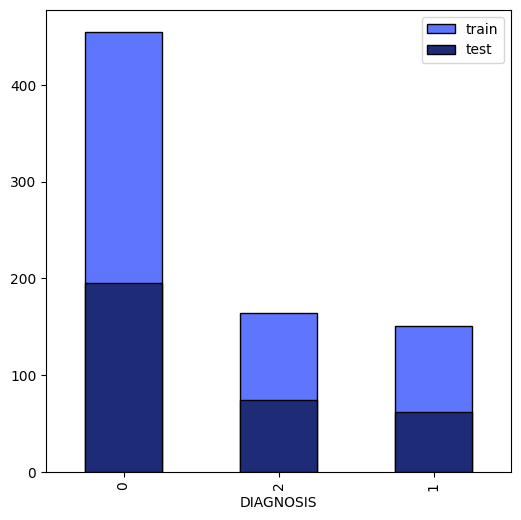

In [14]:
# Plot the target of training/test set using bar
plt.figure(figsize = (6,6))

y_train_vis_null.value_counts().plot(kind = "bar", 
                            color = "#5e76fe",
                            edgecolor = "black",
                            label="train",
)

y_test_vis_null.value_counts().plot(kind = "bar", 
                            color = "#1e2c78",
                            edgecolor = "black",
                            label="test",
)

plt.legend(loc="upper right")